In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from sklearn.feature_selection import SelectKBest, chi2
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score,KFold,cross_val_predict
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import sklearn
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV
from sklearn.metrics import roc_auc_score, roc_curve, auc

# models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
#from mlxtend.classifier import StackingCVClassifier
#from xgboost import XGBClassifier
#from lightgbm import LGBMModel

In [2]:
df = pd.read_csv('ind.csv')

In [3]:
df

,mol,apol,ast_violation,ast_violation_ext,a_acc,a_aro,a_count,a_don,a_donacc,a_heavy,...,vdw_vol,vsa_acc,vsa_hyd,vsa_other,vsa_pol,Weight,weinerPath,weinerPol,zagreb,Label
0,Clc1c(-c2c(C)ccc3n[nH]cc23)cc2N(c3c(C(C)C)cccc...,87.374580,3,4,5,21,72,2,7,41,...,667.22748,32.816418,431.06790,41.580635,51.658497,567.09302,5235,78,228,1
1,Clc1c(-c2c(F)cccc2O)nc2N(c3c(C(C)C)nccc3C)C(=O...,84.546791,3,4,6,18,71,1,7,41,...,652.15259,44.181568,422.21329,52.771198,57.748489,577.06000,5138,80,224,1
2,Clc1c(-c2c(F)cccc2O)nc2N(c3c(C(C)C)ncnc3C(C)C)...,89.407166,3,5,7,18,76,1,8,43,...,683.08276,49.864147,422.21329,77.561714,63.431068,606.10199,5762,84,234,1
3,Clc1c(-c2c(F)cccc2O)nc2N(c3c(CC)cccc3C)C(=O)N=...,82.779999,3,4,5,18,69,1,6,40,...,639.74982,38.498993,413.23126,52.771198,52.065914,562.04498,4837,78,218,1
4,Clc1c(-c2c(F)cccc2O)nc2N(c3c(C(C)C)ncnc3C(C)C)...,89.407166,3,5,7,18,76,1,8,43,...,683.08276,49.864147,422.21329,77.561714,63.431068,606.10199,5762,84,234,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,Clc1cc(CN2CCN(CC(=O)Nc3cc4c(-n5c(-c6cc(Cl)ccc6...,81.472206,3,4,5,23,66,1,6,38,...,707.02869,32.409000,415.53558,35.330658,38.091576,547.48999,5669,61,208,0
393,Clc1c(C(F)(F)F)cc(NC(=O)c2cc(Nc3ncnc4c3nc(N3CC...,70.245857,3,4,5,22,58,2,7,38,...,631.82166,36.297226,334.19284,64.612183,47.662376,545.92798,5101,63,208,0
394,FC(F)(F)c1c(CN2CCN(CC)CC2)ccc(NC(=O)c2cc(C#Cc3...,82.536789,3,4,4,17,70,1,5,40,...,726.85468,19.249496,464.31961,24.140093,24.932074,545.60901,6242,64,214,0
395,FC(F)(F)c1c(N2C(=O)C3(CC2)CCN(CC2CCOCC2)CC3)cc...,89.147102,3,4,4,6,82,0,4,39,...,738.56836,16.070677,465.50208,12.949531,16.070677,548.69397,5471,66,220,0


In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')

C:\Users\A B C\AppData\Local\Temp\ipykernel_11100\4172614641.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [47]:
X = df.iloc[ : , 1 : 172]
y = df.iloc[:, -1:]

In [6]:
non_negative =X[X>=0]

In [7]:
ddd = non_negative.fillna(value = 0)

In [8]:
    norma =  preprocessing.normalize(ddd)
norma

array([[0.07145159, 0.00245329, 0.00327105, ..., 0.00300924, 0.00856197,
        0.42875828],
       [0.067734  , 0.00240343, 0.00320457, ..., 0.00291232, 0.00839309,
        0.42679485],
       [0.06748968, 0.00226457, 0.00377429, ..., 0.00274987, 0.00801693,
        0.42514039],
       ...,
       [0.06751995, 0.00245418, 0.00327224, ..., 0.00340421, 0.00844984,
        0.43938529],
       [0.07242675, 0.00243732, 0.00324976, ..., 0.00328844, 0.00833156,
        0.42772945],
       [0.06537486, 0.00265879, 0.00354505, ..., 0.0036522 , 0.00870674,
        0.43406907]])

In [9]:
from sklearn.model_selection import train_test_split
wq=X_train, X_test, y_train, y_test = train_test_split(norma, y, test_size= 0.3 )
print(f" the shape of training set: {X_train.shape}")
print(f" the shape of testing set: {X_test.shape}")

 the shape of training set: (277, 161)
 the shape of testing set: (120, 161)


# MODELS

# SVM

In [10]:
param_grid = { 'C': [0.1 , 1 ,10 ,100, 1000],
             'gamma': [1 , 0.1 , 0.001 , 0.0001]}

In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
grid = GridSearchCV(SVC() , param_grid, verbose = 2)

In [13]:
grid.fit(X_train , y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END .................................C=0.1, gamma=0.001; total time=   0.0s
[CV] END .................................C=0.1

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001]},
             verbose=2)

In [14]:
grid.best_params_

{'C': 100, 'gamma': 1}

In [15]:
grid.best_score_

0.9568181818181818

In [16]:
grid_pred = grid.predict(X_test)

In [17]:
aa = pd.DataFrame(grid_pred)

In [18]:
aa.value_counts()

0    95
1    25
dtype: int64

In [19]:
print("The AUC of KNN after selection: {}".format(grid.score(X_test, y_test)))

The AUC of KNN after selection: 0.9666666666666667


# KNN 

In [20]:
knn = KNeighborsClassifier(n_neighbors=2)

In [21]:
knn.fit(X_train , y_train)

KNeighborsClassifier(n_neighbors=2)

In [22]:
knn_pred = knn.predict(X_test)

In [23]:
aa = pd.DataFrame(knn_pred)

In [24]:
aa.value_counts()

0    91
1    29
dtype: int64

In [25]:
#knn_pred.reshape(116 , 1)

In [26]:
y_test.shape

(120, 1)

In [27]:
acc = accuracy_score(y_test , knn_pred)
print('Accuracy=' , acc)

Accuracy= 0.9166666666666666


In [28]:
aa.value_counts()

0    91
1    29
dtype: int64

# RESULTS

# KNN scores

In [29]:


acc = accuracy_score(y_test , knn_pred)
print('Accuracy=' , acc)

f1 = f1_score(y_test , knn_pred)
print('f1_score = ' , f1)


precision = precision_score(y_test , knn_pred)
print('precision =' ,  precision)

roc = roc_auc_score( y_test , knn_pred)
print('roc_auc score=', roc)




cm=confusion_matrix(y_test,knn_pred)
print("Confusion Matrix:\n",cm,"\n")


TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
TP=cm[1,1]

#Sensitivity

sen=TP/float(TP+FN)
print("Sensitivity=",sen,"\n")

#Specificity

spe=TN/float(TN+FP)
print("Specificity=",spe,"\n")
import math
#MCC
mcc= float((TP*TN)-(FP*FN))/float(math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)))
print("MCC =",mcc)

Accuracy= 0.9166666666666666
f1_score =  0.8076923076923076
precision = 0.7241379310344828
roc_auc score= 0.915284625728373
Confusion Matrix:
 [[89  8]
 [ 2 21]] 

Sensitivity= 0.9130434782608695 

Specificity= 0.9175257731958762 



# SVM SCORES

In [30]:
acc = accuracy_score(y_test , grid_pred)
print('Accuracy=' , acc)

f1 = f1_score(y_test , grid_pred)
print('f1_score = ' , f1)


precision = precision_score(y_test , grid_pred)
print('precision =' ,  precision)

roc = roc_auc_score( y_test , grid_pred)
print('roc_auc score=', roc)

print('classification report \n',classification_report(y_test , grid_pred))


cm=confusion_matrix(y_test,grid_pred)
print("Confusion Matrix:\n",cm,"\n")

cm


TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
TP=cm[1,1]

#Sensitivity

sen=TP/float(TP+FN)
print("Sensitivity=",sen,"\n")

#Specificity

spe=TN/float(TN+FP)
print("Specificity=",spe,"\n")
import math
#MCC
mcc= float((TP*TN)-(FP*FN))/float(math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)))
print("MCC =",mcc)

Accuracy= 0.9666666666666667
f1_score =  0.9166666666666666
precision = 0.88
roc_auc score= 0.9627969520394442
classification report 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98        97
           1       0.88      0.96      0.92        23

    accuracy                           0.97       120
   macro avg       0.93      0.96      0.95       120
weighted avg       0.97      0.97      0.97       120

Confusion Matrix:
 [[94  3]
 [ 1 22]] 

Sensitivity= 0.9565217391304348 

Specificity= 0.9690721649484536 



# Random Forest

In [31]:
param_grid = {'n_estimators': [5, 10, 15, 20, 25,30]}
gr_raw_RF = GridSearchCV(RandomForestClassifier(random_state=1994), param_grid, cv=5, scoring='roc_auc')
gr_raw_RF.fit(X_train , y_train)
print("The AUC of RF after selection: {}".format(gr_raw_RF.score(X_test, y_test)))

The AUC of RF after selection: 0.9894666069027342


In [32]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=9)
kf=KFold(n_splits=10,shuffle=True,random_state=5)

#Accuracy
acc =cross_val_score(rf,X, y,cv=kf,scoring="accuracy")
print("Accuracy =",acc.mean(),"\n")

#F1-Score
f1 =cross_val_score(rf,X, y,cv=kf,scoring="f1")
print("F1 Score=",f1.mean(),"\n")

#precision
precision =cross_val_score(rf,X, y,cv=kf,scoring="precision")
print("Precision=",precision.mean(),"\n")

#Recall
recall =cross_val_score(rf,X, y,cv=kf,scoring="recall")
print("Recall =",recall.mean(),"\n")

#auc
auc =cross_val_score(rf,X, y,cv=kf,scoring="roc_auc")
print("Auc =",auc.mean(),"\n")

y_pred=cross_val_predict(rf,X,y,cv=kf)

#Confusion Matrix
cm=confusion_matrix(y,y_pred)
print("Confusion Matrix:\n",cm,"\n")

#confusion metrics measures
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
TP=cm[1,1]

#Sensitivity
sen=TP/float(TP+FN)
print("Sensitivity=",sen,"\n")

#Specificity
spe=TN/float(TN+FP)
print("Specificity=",spe,"\n")
import math
#MCC
mcc= float((TP*TN)-(FP*FN))/float(math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)))
print("MCC =",mcc)

Accuracy = 0.9824999999999999 

F1 Score= 0.9823240352652117 

Precision= 0.9857142857142858 

Recall = 0.9558479532163743 

Auc = 0.9911329061902066 

Confusion Matrix:
 [[296   2]
 [  3  96]] 

Sensitivity= 0.9696969696969697 

Specificity= 0.9932885906040269 

MCC = 0.966266387331312


In [33]:
Rf_pred = gr_raw_RF.predict(X_test)

In [34]:
from sklearn.naive_bayes import GaussianNB

In [35]:
GNB =  GaussianNB()

In [36]:
GNB.fit(X=X_train, y=y_train)

GaussianNB()

In [37]:
predicted = GNB.predict(X=X_test)

In [38]:
expected = y_test

In [39]:
predicted[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
      dtype=int64)

In [40]:
expected[:20]

,Label
164,0
143,0
302,0
253,0
288,0
292,0
163,0
245,0
309,0
79,1


In [41]:
wrong = [(p, e) for (p, e) in zip(predicted, expected) if p != e]

In [42]:
wrong

[(0, 'Label')]

In [43]:
print(f'{GNB.score(X_test, y_test):.2%}')

95.83%


# GaussianNB

In [45]:
from sklearn.model_selection import cross_val_score,KFold,cross_val_predict
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import sklearn

In [48]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()

kf=KFold(n_splits=10,shuffle=True,random_state=5)

#Accuracy
acc =cross_val_score(nb,X, y,cv=kf,scoring="accuracy")
print("Accuracy =",acc.mean(),"\n")

#F1-Score
f1 =cross_val_score(nb,X, y,cv=kf,scoring="f1")
print("F1 Score=",f1.mean(),"\n")

#precision
precision =cross_val_score(nb,X, y,cv=kf,scoring="precision")
print("Precision=",precision.mean(),"\n")

#Recall
recall =cross_val_score(nb,X, y,cv=kf,scoring="recall")
print("Recall =",recall.mean(),"\n")

#auc
auc =cross_val_score(nb,X, y,cv=kf,scoring="roc_auc")
print("Auc =",auc.mean(),"\n")

y_pred=cross_val_predict(nb,X,y,cv=kf)

#Confusion Matrix
cm=confusion_matrix(y,y_pred)
print("Confusion Matrix:\n",cm,"\n")

#confusion metrics measures
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
TP=cm[1,1]

#Sensitivity
sen=TP/float(TP+FN)
print("Sensitivity=",sen,"\n")

#Specificity
spe=TN/float(TN+FP)
print("Specificity=",spe,"\n")

#MCC
mcc= float((TP*TN)-(FP*FN))/float(math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)))
print("MCC =",mcc)

Accuracy = 0.9094230769230769 

F1 Score= 0.8318738469768219 

Precision= 0.7336996336996338 

Recall = 0.9805555555555555 

Auc = 0.9704213157342604 

Confusion Matrix:
 [[264  34]
 [  2  97]] 

Sensitivity= 0.9797979797979798 

Specificity= 0.8859060402684564 

MCC = 0.7965603729314897


In [50]:
GNB =  GaussianNB()

In [51]:
GNB.fit(X_train,y_train)
print("The AUC of GNB after selection: {}".format(GNB.score(X_test, y_test)))

The AUC of GNB after selection: 0.9583333333333334


In [52]:
GNB_pred = GNB.predict(X_test)

In [53]:
acc = accuracy_score(y_test , GNB_pred)
print('Accuracy=' , acc)

f1 = f1_score(y_test , GNB_pred)
print('f1_score = ' , f1)


precision = precision_score(y_test , GNB_pred)
print('precision =' ,  precision)

roc = roc_auc_score( y_test , GNB_pred)
print('roc_auc score=', roc)

print('classification report \n',classification_report(y_test , GNB_pred))


cm=confusion_matrix(y_test,GNB_pred)
print("Confusion Matrix:\n",cm,"\n")

cm


TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
TP=cm[1,1]

#Sensitivity

sen=TP/float(TP+FN)
print("Sensitivity=",sen,"\n")

#Specificity

spe=TN/float(TN+FP)
print("Specificity=",spe,"\n")

Accuracy= 0.9583333333333334
f1_score =  0.8837209302325583
precision = 0.95
roc_auc score= 0.9078888390856119
classification report 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        97
           1       0.95      0.83      0.88        23

    accuracy                           0.96       120
   macro avg       0.95      0.91      0.93       120
weighted avg       0.96      0.96      0.96       120

Confusion Matrix:
 [[96  1]
 [ 4 19]] 

Sensitivity= 0.8260869565217391 

Specificity= 0.9896907216494846 



In [54]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, knn_pred)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, grid_pred)
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, Rf_pred)
false_positive_rate4, true_positive_rate4, threshold = roc_curve(y_test, GNB_pred)

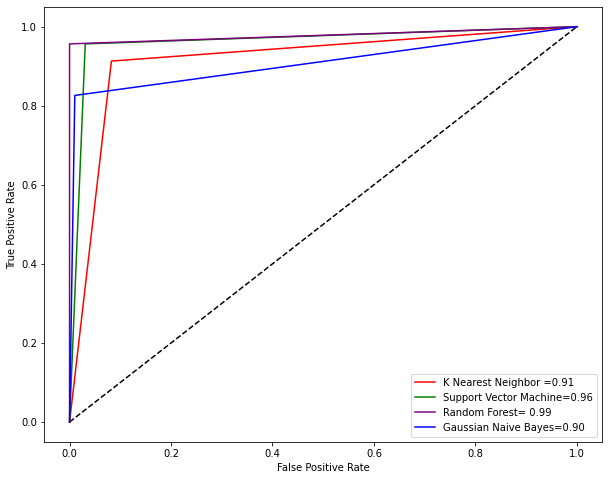

In [55]:
plt.figure(figsize=(10,8))
plt.plot([0,1],[0,1], 'k--')
plt.plot(false_positive_rate1, true_positive_rate1, label= "K Nearest Neighbor =0.91" , color = 'red' , linewidth = 1.5 )
plt.plot(false_positive_rate2, true_positive_rate2, label= "Support Vector Machine=0.96", color = 'green', linewidth = 1.5 ) 
plt.plot(false_positive_rate3, true_positive_rate3, label= "Random Forest= 0.99", color = 'purple', linewidth =  1.5 ) 
plt.plot(false_positive_rate4, true_positive_rate4, label= "Gaussian Naive Bayes=0.90", color = 'blue', linewidth =   1.5 ) 

plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.savefig('ROC.jpg',dpi=600)
plt.show()


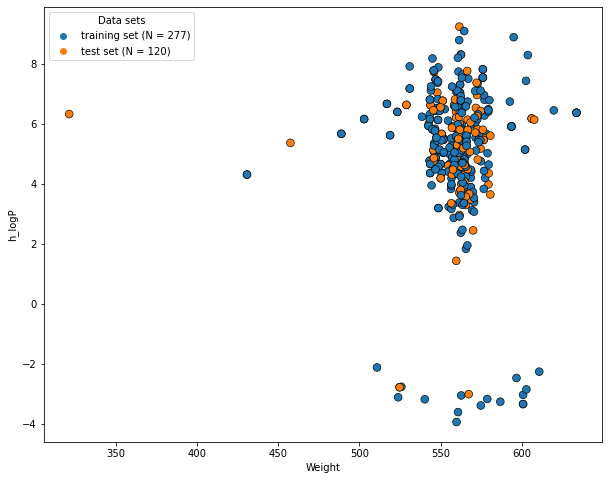

In [57]:
df['Data sets'] = 'test set (N = 120)'
df.loc[y_train.index, 'Data sets'] = 'training set (N = 277)'
plt.figure(figsize=(10,8))
sns.scatterplot(df.Weight, df.h_logP, hue=df['Data sets']  ,s = 60,  linewidth = 0.65  , edgecolor = 'black' )
plt.savefig('figure 1A.jpg',dpi=1200)